In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] =(20,10)


In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['size'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8790
Name: size, dtype: int64

In [5]:
df2 = df1.drop(['society','area_type','availability'],axis = 1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
print(df2.isnull().sum())
df2.dropna()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [8]:
df2['bhks'] = df2['size'].str.split(' ').str[0]

In [9]:
df2['bhks']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhks, Length: 13320, dtype: object

In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhks
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df3 = df2.drop(['size'],axis ='columns')

In [12]:
df3.isna().sum()

location        1
total_sqft      0
bath           73
balcony       609
price           0
bhks           16
dtype: int64

In [13]:
df3 = df3.dropna()

In [14]:
df3['bhks'] = df3['bhks'].astype('int')

In [15]:
df3.head(5)

,location,total_sqft,bath,balcony,price,bhks
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [16]:
df3['bhks'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [17]:
df3[df3.bhks>20]

,location,total_sqft,bath,balcony,price,bhks
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True 


In [20]:
df3[~df3['total_sqft'].apply(is_float)]
#   ~ negate operation 

,location,total_sqft,bath,balcony,price,bhks
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [21]:
def conversion(x):
    token = x.split('-')
    if len(token) == 2 :
        return (float(token[0])+ float(token[1]))/2
    try:
        return float(x)
    except: 
        return None


In [22]:
print(conversion('2166'))


2166.0


In [23]:
print(conversion('2100 - 2850'))

2475.0


In [24]:
df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(conversion)
df4.head()

,location,total_sqft,bath,balcony,price,bhks
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [25]:
df4.isna().sum()

location       0
total_sqft    42
bath           0
balcony        0
price          0
bhks           0
dtype: int64

In [26]:
df4['total_sqft'][30]

2475.0

In [27]:
df4.iloc[30,1]

1693.0

In [28]:
df4.loc[30][1]

2475.0

In [29]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,bhks,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
len(df5.location.unique())

1265

In [31]:
df5.location = df5.location.apply(lambda x : x.strip())  # strip removes spaces from front and end of string
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1017

In [33]:
locations_smaller_than_10 = location_stats[location_stats<=10]
locations_smaller_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [34]:
df5.location = df5.location.apply(lambda x : 'other' if x in locations_smaller_than_10 else x)
len(df5.location.unique())

238

In [35]:
df5[['location']].head()

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur


In [36]:
df5[df5.bhks>=11]

,location,total_sqft,bath,balcony,price,bhks,price_per_sqft
459,other,5000.0,9.0,3.0,360.0,11,7200.000000
1718,other,8000.0,27.0,0.0,230.0,27,2875.000000
1768,other,1200.0,11.0,0.0,170.0,11,14166.666667
3853,other,1200.0,6.0,3.0,150.0,11,12500.000000
4684,Munnekollal,2400.0,40.0,0.0,660.0,43,27500.000000
4916,other,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Mysore Road,2232.0,6.0,2.0,300.0,12,13440.860215
9935,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [37]:
df5.loc[(df5.bhks>10)]

,location,total_sqft,bath,balcony,price,bhks,price_per_sqft
459,other,5000.0,9.0,3.0,360.0,11,7200.000000
1718,other,8000.0,27.0,0.0,230.0,27,2875.000000
1768,other,1200.0,11.0,0.0,170.0,11,14166.666667
3853,other,1200.0,6.0,3.0,150.0,11,12500.000000
4684,Munnekollal,2400.0,40.0,0.0,660.0,43,27500.000000
4916,other,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Mysore Road,2232.0,6.0,2.0,300.0,12,13440.860215
9935,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [38]:
df5[df5.total_sqft/df5.bhks<300].head()   # outliers removed

,location,total_sqft,bath,balcony,price,bhks,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [39]:
df5.shape

(12710, 7)

In [40]:
df6 = df5[~(df5.total_sqft/df5.bhks<300)]
df6.shape

(12055, 7)

In [41]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key , sub_data_frame in df.groupby('location'):
        m = np.mean(sub_data_frame.price_per_sqft)
        st = np.std(sub_data_frame.price_per_sqft)
        reduced_df = sub_data_frame[(sub_data_frame.price_per_sqft>(m-st)) & (sub_data_frame.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)
    return df_out    
df7 = remove_outliers(df6)
df7.shape

(9848, 7)

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhks==2)]
    bhk3 = df[(df.location==location) & (df.bhks==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue',label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color ='green',label = '3 BHK', s=50,marker ='+')
    plt.xlabel("Total square feet area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()

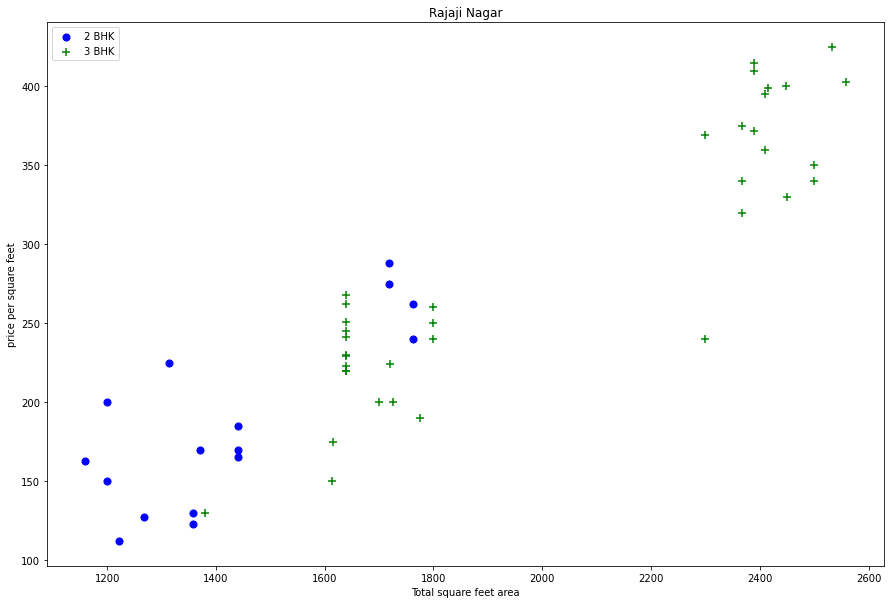

In [44]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [45]:
print(df7.groupby("location").count())

                           total_sqft  bath  balcony  price  bhks  \
location                                                            
1st Block Jayanagar                 7     7        7      7     7   
1st Phase JP Nagar                 17    17       17     17    17   
2nd Phase Judicial Layout           8     8        8      8     8   
2nd Stage Nagarbhavi                6     6        6      6     6   
5th Phase JP Nagar                 28    28       28     28    28   
...                               ...   ...      ...    ...   ...   
Yelahanka                         167   167      167    167   167   
Yelahanka New Town                 32    32       32     32    32   
Yelenahalli                         9     9        9      9     9   
Yeshwanthpur                       65    65       65     65    65   
other                            2200  2200     2200   2200  2200   

                           price_per_sqft  
location                                   
1st Block Jaya

removing those 2 bhks apartments whose price_per_sqft is less than mean price_per_sqft is less than mean price_per_sqft of 1 BHK apartment 

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('bhks'):
            bhk_stats[bhk] ={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
                 }
        for bhk, bhk_df in location_df.groupby('bhks'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis ='index')      

df8 = remove_bhk_outliers(df7)
df8.shape

(7025, 7)

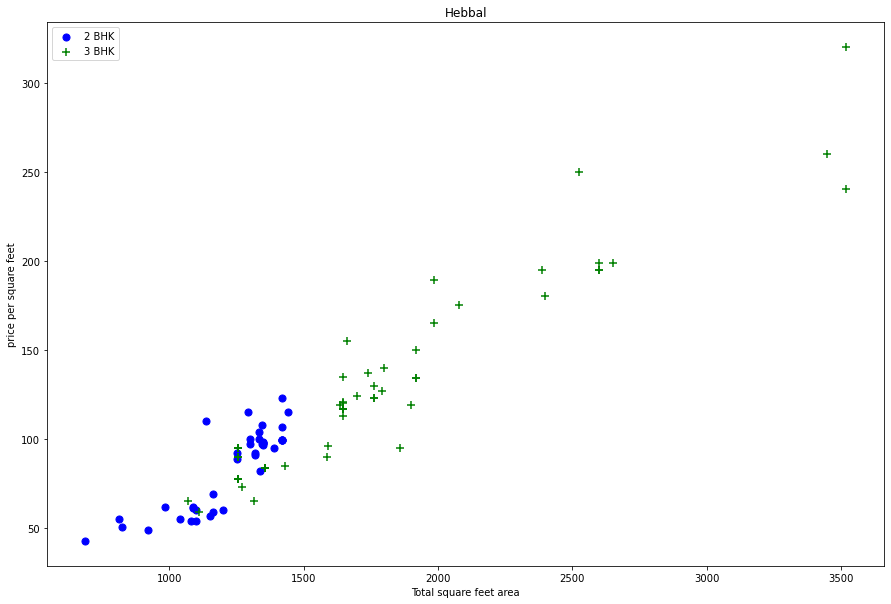

In [47]:
plot_scatter_chart(df7, "Hebbal")

Text(0, 0.5, 'count')

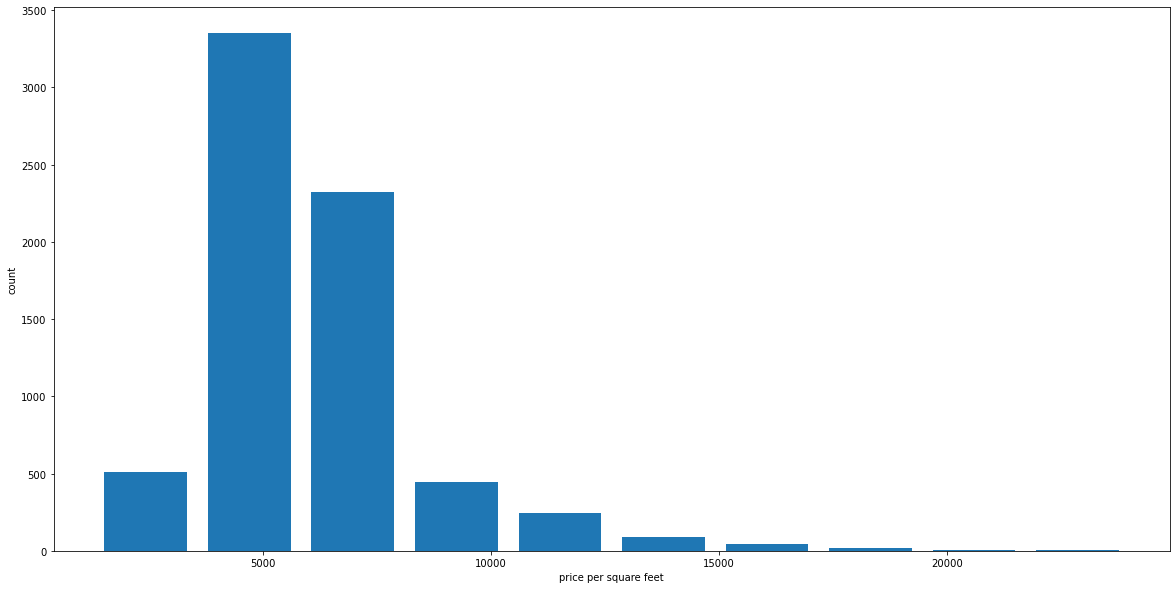

In [48]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft , rwidth =0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'count')

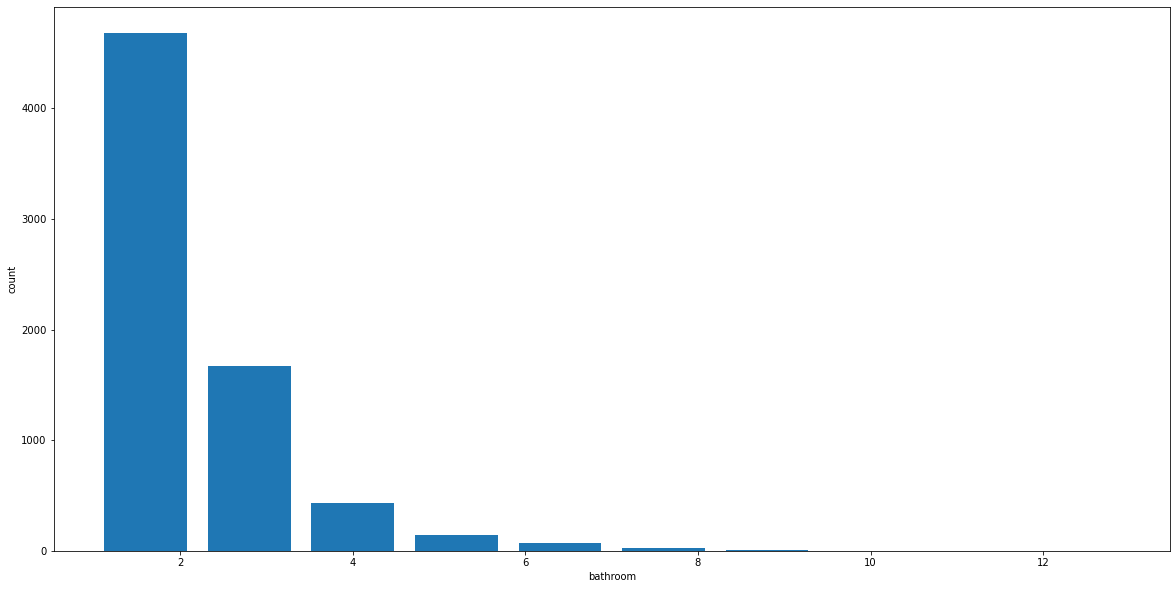

In [50]:
plt.hist(df8.bath,rwidth =0.8)
plt.xlabel("bathroom")
plt.ylabel("count")


In [51]:
df8[(df8.bath>df8.bhks+2)]

,location,total_sqft,bath,balcony,price,bhks,price_per_sqft
1542,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [52]:
df9 = df8[~(df8.bath>df8.bhks+2)]

In [53]:
df10 = df9.drop(['price_per_sqft'],axis =1)
df10.shape

(7022, 6)

In [54]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = pd.concat([df10,dummies.drop('other',axis =1)],axis = 'columns')
# droping one column which can be identified be 0 in all other columns for saving memory

In [56]:
df11.head(3)

,location,total_sqft,bath,balcony,price,bhks,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12 = df11.drop(['location','balcony'],axis = 1)
df12.head()

,total_sqft,bath,price,bhks,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df12.loc[(df12['Indira Nagar'] == 1 ),['Indira Nagar','price','bath','total_sqft']]

,Indira Nagar,price,bath,total_sqft
3339,1,93.0,2.0,1200.0
3340,1,105.0,2.0,1128.0
3341,1,330.0,3.0,2800.0
3342,1,200.0,3.0,1650.0
3344,1,102.0,2.0,1210.0
3345,1,105.0,2.0,1224.0
3346,1,225.0,3.0,2070.0
3347,1,70.0,1.0,500.0
3348,1,168.0,2.0,1400.0
3350,1,100.0,2.0,1145.0


In [59]:
df12.shape

(7022, 241)

In [60]:
# dropping price as it is dependent variable

x = df12.drop('price',axis =1)

In [61]:
x.shape

(7022, 240)

In [62]:
y = df12.price

In [63]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

In [64]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8538375203317555

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits =5, test_size = 0.2, random_state =1)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8419479 , 0.85712341, 0.844581  , 0.87139841, 0.8596668 ])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


,model,best_score,best_params
0,linear_regression,0.807847,{'normalize': False}
1,lasso,0.665439,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.703122,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [67]:
x.columns

Index(['total_sqft', 'bath', 'bhks', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [68]:
# np.where(x.columns =='Vijayanagar')[0][0]

In [69]:
def predict_price(location,sqft,bath,bhks):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhks
    if loc_index >= 0:
        z[loc_index] = 1

    return lr.predict([z])[0]


In [70]:
predict_price('Vijayanagar',1000,2,2)

63.87866915034688

In [71]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))